In [1]:
from nimbro_vision_server.utils import load_image_b64, visualize_mmgroundingdino

### Setup

In [2]:
import json
import requests

TOKEN = "super_secret_access_token"
headers = {
    "Authorization": f"Bearer {TOKEN}"
}

# make sure to start an mmGroundingDINO server and use the correct address, port and access token
server_base = "http://localhost:9000"

### Health

In [3]:
url = f"{server_base}/health"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print("Data:", data)
else:
    print("Failed to retrieve health. Status code:", response.status_code)

Data: {'status': 'ok', 'cuda_available': True}


### Model Flavors

In [4]:
url = f"{server_base}/model_flavors"

response = requests.get(url, headers=headers)
if response.status_code == 200:
    data = response.json()
    print("Data:", data)
else:
    print("Failed to retrieve model flavors. Status code:", response.status_code)

Data: {'flavors': ['tiny', 'base', 'large', 'large_zeroshot', 'llmdet_tiny', 'llmdet_base', 'llmdet_large']}


### Load Model

* Alternatively use "export MMGROUNDINGDINO_PRELOAD_FLAVOR=large" before starting the server.

In [5]:
url = f"{server_base}/load"
payload = {'flavor': 'large'}

response = requests.post(url, json=payload, headers=headers)

if response.status_code == 200:
    output = response.json()
    print(output)
else:
    print(f"Request failed with status code: {response.status_code}")

{'loaded_model': 'Model', 'flavor': 'large'}


### Load example for inference endpoint

In [6]:
# load and show example image
image_b64 = load_image_b64('example_image.jpg')

### Inference

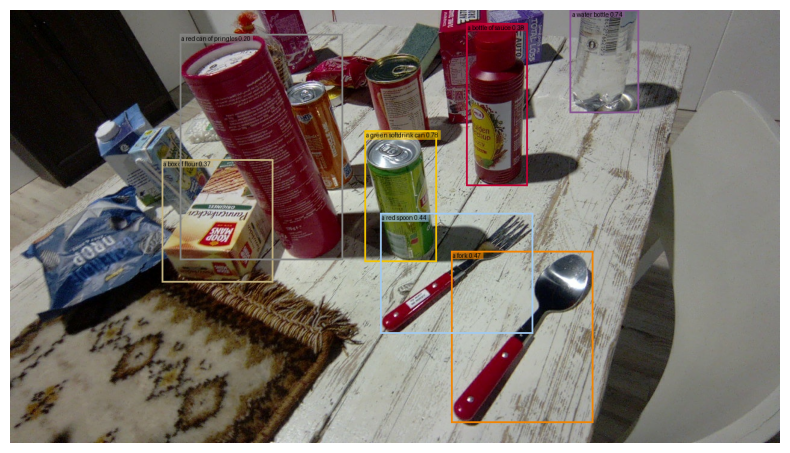

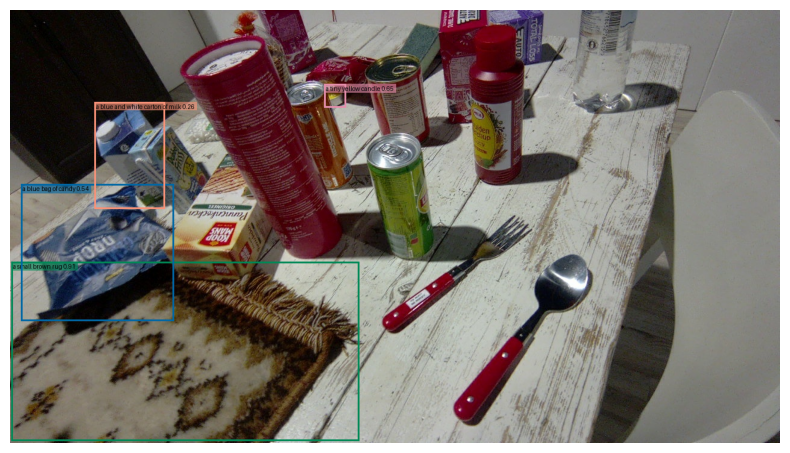

In [7]:
url = f"{server_base}/infer"

prompts = ['a red spoon', 'a fork', 'a red can of pringles', 'a bottle of sauce', 'a green softdrink can', 'a box of flour', ' a water bottle']
other_prompts = ['a blue bag of candy', 'a small brown rug', 'a blue and white carton of milk', 'a tiny yellow candle']
# multiple images or multiple inference parameters can be passed at the same time. 
# if there is multiple of one and one of the other, the singleton is broadcast to all other ones
# example: multiple inference parameters, but only one image
inference_parameters_0 = {'prompts': prompts, 'min_confidence': 0.05, 'overdetect_factor': 1., 'nms_iou': 0.5}
# note that confidence is always applied, but NMS and overdetect factor budget is constrained only if given
inference_parameters_1 = {'prompts': other_prompts, 'min_confidence': 0.05, 'overdetect_factor': 1.}
payload = {'images': [image_b64, image_b64], 'inference_parameters': [inference_parameters_0, inference_parameters_1]}

response = requests.post(url, json=payload, headers=headers)

if response.status_code == 200:
    output = response.json()
else:
    print(f"Request failed with status code: {response.status_code}")

_ = visualize_mmgroundingdino(payload, output)

### Unload Model

In [8]:
url = f"{server_base}/unload"

response = requests.post(url, headers=headers)

if response.status_code == 200:
    output = response.json()
    print(output)
else:
    print(f"Request failed with status code: {response.status_code}")

{'unloaded': True}


In [9]:
#with open("example_artifact_mmgroundingdino.json", "w", encoding="utf-8") as f:
#    json.dump(output, f, ensure_ascii=False, indent=4)